# US Youtube Trending Data Capstone Project

# Phase 1: Background of the Study

### There's a client from US who wants to use YouTube to share video content and wants the channel to grow. Since YouTube is the most popular video sharing platform has become very influential. Anything that trending on Youtube can help a business such as for video creator or business that use this platform to grow or the otherwise. 

### According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”.

# Phase 2: Problem Statement

### Client wants to know what is the characteristic of YouTube video that makes it become trending and sustain on YouTube.


### First of all, we need to know what determines if a video is ranked on Trending. According to Youtube Helps Center, amongst the many great new videos on YouTube on any given day, Trending can only show a limited number. Trending aims to surface videos that:

#### - Are appealing to a wide range of viewers
#### - Are not misleading, clickbaity or sensational
#### - Capture the breadth of what’s happening on YouTube and in the world
#### - Showcase a diversity of creators
#### - Ideally, are surprising or novel

### Trending aims to balance all of these considerations. To achieve this, Trending considers many signals, including (but not limited to):

#### - View count
#### - How quickly the video is generating views (i.e. “temperature”)
#### - Where views are coming from, including outside of YouTube
#### - The age of the video
#### - How the video performs compared to other recent uploads from the same channel

### As a Data Analyst, we need to answer the following question:
#### 1. How are the factors make videos become trending on Youtube?

# Phase 3: Preparing, Cleaning and Understanding Data

## 1. Preparing Data
### 1a. Since there are 2 Datasets with 2 different types, we need to make the datasets' access path first for each one to assuring every datasets are prepared enough to cleaning and analyzing process.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
import os
working_directory = os.getcwd()
print(working_directory)

/Users/macbook2015


In [101]:
path_csv = working_directory + '/Documents/Data Science Purwadhika/Dataset/Bahan Capstone Modul 2/USvideos.csv'
path_json = working_directory + '/Documents/Data Science Purwadhika/Dataset/Bahan Capstone Modul 2/US_category_id.json'

### 1b. Access the USvideos.csv dataset to get some information and overview from this data.

In [102]:
pd.set_option('display.max_colwidth', None)
df_csv = pd.read_csv(path_csv)
df_csv.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\nPaulina Gregory\n\n\nShots Studios Channels:\nAle

In [103]:
display(df_csv.describe(),df_csv.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.24.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/
freq,30,200,30,203,50,1535,30,58


In [104]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

#### From the list beyond we can see that there are 16 columns and 40949 rows on this dataset (except the 'description' column, later it will be checked when recheck the missing value), which for the columns are described as:

#####    video_id           : unique ID of the video     
#####  trending_date  : the date when video go trending (Format: YY.DD.MM)        
#####   title                   : video title
#####   channel_title    : channel name
#####   category_id      : video category/genre ID (need to see JSON file to see its function)      
#####   publish_time    : the date video published (Format: Datetime) 
#####   tags                  : video tags  
#####   views                : video view count  
#####   likes                  : video like count     
#####   dislikes             : video dislike count   
#####   comment_count              : video comment count
#####   thumbnail_link                 : video thumbnail URL
#####   comments_disabled       : boolean parameter which shows whether the video comments section is disabled or not
#####   ratings_disabled    : boolean parameter which shows whether the video ratings section is disabled or not    
#####   video_error_or_removed : boolean parameter which shows whether the channels's video has been removed    
#####   description : description on video description box   

### 1c. Access the US_category_id.json dataset to get some information and overview from this data.

In [105]:
#Since in csv file there's category_id but not the category, we need to access the information from this JSON file since its title is US_category_id.json
df_json = pd.read_json(path_json)
df_json.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}"
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""', 'id': '17', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Sports', 'assignable': True}}"


In [106]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    32 non-null     object
 1   etag    32 non-null     object
 2   items   32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [107]:
df_json.describe()

,kind,etag,items
count,32,32,32
unique,1,1,32
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/u8WXzF4HIhtEi805__sqjuA4lEk""', 'id': '36', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Drama', 'assignable': False}}"
freq,32,32,1


#### From this .json dataset, there are 32 rows of data in 3 columns. However from all the columns, only 'items' column which can be used for analysis since it is provided by unique data in each row.

In [108]:
#See Column 'items'
df_json.loc[:,['items']].head()

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"
3,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}"
4,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""', 'id': '17', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Sports', 'assignable': True}}"


#### As seen above, there are dictionaries that contain 'id' which represent 'category_id' in CSV file earlier and also 'title' which represent the category name. It is a must to access this 2 keys and its values for this analysis.

In [109]:
#access category_id
df_json.loc[:,['items']].iloc[0,0]['id']

'1'

In [110]:
#access category_title
df_json.loc[:,['items']].iloc[0,0]['snippet']['title']

'Film & Animation'

In [111]:
#make dataframe for category
list_id = []
list_category = []

for i in df_json.loc[:,'items']:
    list_id.append(i['id'])
    list_category.append(i['snippet']['title'])

df_category = pd.DataFrame({'category_id':list_id,'category':list_category})
df_category

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [112]:
df_category.describe()

,category_id,category
count,32,32
unique,32,31
top,24,Comedy
freq,1,2


In [113]:
#from describe we can see that there's 31 different id from 32 rows. However, it doesn't need to be filtered now since it will bo correlated with the CSV dataset. The unused id will be filtered automatically.
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     object
 1   category     32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [114]:
# category_id in df_category is still in object type, it must be casted into same datatype with category_id in CSV file
df_category['category_id']=df_category['category_id'].astype(np.int64)
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     int64 
 1   category     32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


### 1d. Joining df_csv and df_category 

In [115]:
df = pd.merge(df_csv, df_category, how='inner', left_on='category_id', right_on='category_id')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,Fals

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [117]:
display(df.describe(),df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40949,40949,40949,40949,40949,40949,40949,40379,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,16
top,j4KvrAUjn6c,18.24.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,30,200,30,203,50,1535,30,58,9964


#### From the list beyond after joining, there is only 1 added columns: 'category' which represents video category from .json dataset.

## 2. Data Cleaning & Understanding

### 2a. Check Duplicate Data

#### Check Duplicate Data

In [118]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
2864,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""steven lim""|""niki ang""|""alex choi""|""alpacas""|""mini pigs""|""dogs""|""cats""|""nkla""|""BuzzFeedBlue""|""BuzzFeed""|""Worth it pets""|""Worth it Lifestyle""|""lifestyle""|""pets""|""pet""|""price points""|""cheap""|""expensive""|""cute""|""animals""|""lifestyle changes""|""pet lover""|""best friends animal society""|""no kill shelter""|""pet shelter""",3081033,60379,6857,7796,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,"“Who is Lennox and why is he so special?”Credits: https://www.buzzfeed.com/bfmp/videos/50647Check out more awesome videos at BuzzFeedBlue!https://bit.ly/YTbuzzfeedvideohttps://bit.ly/YTbuzzfeedblue1https://bit.ly/YTbuzzfeedvioletGET MORE BUZZFEED:https://www.buzzfeed.comhttps://www.buzzfeed.com/videoshttps://www.youtube.com/buzzfeedvideohttps://www.youtube.com/asishttps://www.youtube.com/buzzfeedbluehttps://www.youtube.com/buzzfeedviolethttps://www.youtube.com/perolikehttps://www.youtube.com/ladylikeBuzzFeedBlueSports, video games, Unsolved & more epic daily videos!Love BuzzFeed? Get the merch! BUY NOW: https://goo.gl/iquQQDMUSICIntention_MainLicensed via Warner Chappell Production Music Inc.Big Apple Jam_MainLicensed via Warner Chappell Production Music Inc.Hairy Canary_MainLicensed via Warner Chappell Production Music Inc.Licensed via Audio NetworkSFX Provided By AudioBlocks(https://www.audioblocks.com)EXTERNAL CREDITSNancy Chapel-Izerhttps://www.alpacacountryestates.com/+Art Izerhttps://www.alpacacountryestates.com/+Sandra Gianninihttps://www.socalminipigs.com/+Michelle Sathehttps://nkla.org/",People & Blogs
2865,UQkBcHLZOqU,18.15.05,Wearing Fashion Nova Outfits For A Week,Safiya Nygaard,22,2018-05-11T22:36:56.000Z,"wearing fashion nova outfits for a week|""fashion nova""|""fashion nova outfits""|""cardi b fashion nova""|""cardi b""|""kylie jenner fashion nova""|""kylie jenner""|""nova babe""|""online clothing haul""|""fashion nova haul""|""haul""|""clothing haul""|""safiya fashion nova""|""safiya wish""|""safiya romwe""|""romwe""|""wish""|""safiya nygaard""|""safiya fashion""|""safiya""|""safiya clothes""|""safiya and tyler""",4106029,205285,2180,11217,https://i.ytimg.com/vi/UQkBcHLZOqU/default.jpg,False,False,False,"I've been seeing this mysterious hashtag #NovaBabe all over instagram, so I decided to investigate and see what all the fuss was about. So I bought seven full outfits from Fashion Nova and wore them for a week to see if they were as good IRL as they looked on instagram. What do you think of my Fashion Nova clothing haul? Did I achieve #NovaBabe status?Don’t forget to click the bell to turn on post notifications!Safiya's Nextbeat: https://nextbeat.co/u/safiyaIG: https://www.instagram.com/safiyany/Twitter: https://twitter.com/safiyajnFacebook: https://www.facebook.com/safnygaard/This video is NOT sponsored!Assistant Editor: Claire WileyMUSICMind The GapTop BananaMagazineCafe LatteTrendsetterTails And Top HatsGypsy SailorHuggys StrutTango FusionSharp DresserJet SetterSadangoOohs And Ahhsvia Audio NetworkSFXvia AudioBlocks",People & Blogs
11585,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sneakers""|""news""|""entertainment""|""current affairs""|""young man""|""culture""|""complex tv""|""complex media""|""sneaker shopping with""|""sneaker shopping""|""sneaker shopping on complex""|""youngboy never broke again""|""young boy never broke again""|""youngboy nba 2018""|""youngboy nba""|""joe la puma""|""air jordan 3 powder blue""|""air jordan 11 space jams""|""air jordan 8 retro ovo""|""until death call my name nba"

#### Check Number of Rows Which Contain Duplicate Data 

In [119]:
df.duplicated().sum()

48

#### Drop the data duplication

In [120]:
df.drop_duplicates(keep='first',inplace=True)
df=df.reset_index().drop(columns = {'index'})
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,Fals

In [121]:
display(df.describe(),df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40901,40901,40901,40901,40901,40901,40901,40332,40901
unique,6351,205,6455,2207,6269,6055,6352,6901,16
top,j4KvrAUjn6c,18.24.04,Sam Smith - Pray (Official Video) ft. Logic,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,29,200,29,202,50,1534,29,58,9944


#### Recheck if there is still duplicated rows.

In [122]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category


#### From information above, we can see that the duplicated 48 rows are already dropped. Now, there are already 40901 rows only from 40949. Since the unique data doesn't change, it means the duplicate data cleaning is succeed.

### 2b. Re-check & Process Different Data in One 'video_id'

#### As we see above, there are 6351 unique value of video_id which supposed to be same with unique value of title which has 6455 unique value, we need to check it first to ensure there's not any double title for each video_id 

In [123]:
grps = df.groupby(['video_id'])['title'].apply(set)
filtered = grps[grps.map(len) > 1].index

dbl_id_bfr = df[df.set_index(['video_id']).index.isin(filtered)]

dbl_id_bfr

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs
20,STI2fI7sKMo,17.15.11,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",346924,4657,1838,734,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs
36,STI2fI7sKMo,17.16.11,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",350422,4735,1839,744,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Sub

#### Let's take one example from 925 rows of video_id which troubled.

In [124]:
dbl_id_bfr.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,925,925,925,925,925,925,925,917,925
unique,109,205,221,100,112,142,112,163,15
top,MAjY8mCTXWk,18.18.04,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV",The King of Random,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""袁詠琳""|""cindy""|""yen""|""官方""|""高清""|""不愛我就拉倒""|""繁體""|""浩克""|""彈頭""",https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,Calum’s debut album ‘Only Human’ feat. “You Are The Reason” & “Dancing On My Own” out now! iTunes: https://calumscott.lnk.to/onlyhumanYD/iTunes Listen on Apple Music: https://calumscott.lnk.to/onlyhumanYD/AppleMusic Stream/Add on Spotify: https://calumscott.lnk.to/onlyhumanYD/Spotify Get it on Amazon (CD/MP3/Prime): https://calumscott.lnk.to/onlyhumanYD/Amazon Get it on Google Play: https://calumscott.lnk.to/onlyhumanYD/Google-Play Watch Calum's You Are The Reason (Official Video): https://calumscott.lnk.to/yatrvidYD Director: Ozzie PullinProducer: Alasdair MitchellDirector of Photography: Adric WatsonEditor: Chris RoebuckProduction Company: PartizanExec Producer: Claire StubbsColour: Simon Bourne at Framestore Follow Calum Scott - Facebook: https://calumscott.lnk.to/facebookYD Twitter: https://calumscott.lnk.to/twitterYD @CalumScott Instagram: https://calumscott.lnk.to/instagramYD @CalumScott Spotify: https://calumscott.lnk.to/spotifyYD Soundcloud: https://calumscott.lnk.to/soundcloudYD Official Site: http://www.calumscott.comMusic video by Calum Scott performing What I Miss Most. © 2018 Capitol Recordshttp://vevo.ly/jyfwBz,Music
freq,28,12,27,29,28,28,28,27,258


In [125]:
dbl_id_bfr[dbl_id_bfr['video_id']=='STI2fI7sKMo']['title']

2     AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH - GOOGLE US | Shawn and Andrew
20                                        WE GOOGLED OURSELVES | Shawn and Andrew
36                                        WE GOOGLED OURSELVES | Shawn and Andrew
50                                        WE GOOGLED OURSELVES | Shawn and Andrew
Name: title, dtype: object

#### The mistake above (2 titles for one video_id) is one of mistakes which occured here. If you take mistake sample from other video_id, you will find mistakes such as typo, capital letter differences etc in the video title column.

#### To resolve this problem, let's just replace the double title & video_id rows with most frequent shown video title for each unique video_id

In [126]:
title_list = []
video_id_list = []
df_id_mod=(df.groupby('title')['video_id'].transform(lambda x: x.mode()[0]))

for i in range(len(df_id_mod)):
    title_list.append(df['title'].loc[i].lower())
    video_id_list.append(df_id_mod.loc[i])

df['video_id']=video_id_list
df_title_mod=(df.groupby('video_id')['title'].transform(lambda x: x.mode()[0]))
df['title']= df_title_mod
df.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40901,40901,40901,40901,40901,40901,40901,40332,40901
unique,6343,205,6343,2207,6269,6055,6352,6901,16
top,XiHiW4N7-bo,18.24.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,29,200,29,202,50,1534,29,58,9944


#### As we can see, now the unique number of video_id and title are already same (6343 unique numbers). To see if this method is succeed, we need to filter them once more.

In [127]:
grps = df.groupby(['video_id'])['title'].apply(set)
filtered = grps[grps.map(len) > 1].index

dbl_id_aftr = df[df.set_index(['video_id']).index.isin(filtered)]

dbl_id_aftr

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category


#### The title featuring data already succeed. Now, we need to check once more to see if there's duplicated row due to title featuring data.

In [128]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category


#### Without any duplication data, we can continue to next data cleaning & featuring process. 

### 2c. Check & Process Missing Value Data

In [129]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs
2,STI2fI7sKMo,17.14.11,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs


In [130]:
display(df.describe(),df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category
count,40901,40901,40901,40901,40901,40901,40901,40332,40901
unique,6343,205,6343,2207,6269,6055,6352,6901,16
top,XiHiW4N7-bo,18.24.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Facebook: https://www.facebook.com/Power1051NY/\n► Twitter: https://twitter.com/power1051/\n► Instagram: https://www.instagram.com/power1051/,Entertainment
freq,29,200,29,202,50,1534,29,58,9944


#### We can see there's top unique data in 'tags' column which has value = '[none]', it needs to be counted since 'tags' data values are object it means the '[none]' also can be valued as nan value.

In [131]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
category                    0
dtype: int64

In [132]:
(df['tags']=='[none]').sum()

1534

#### From the Dataset above we can see that there are 569 rows NaN values  in 'description' column. For the '[none]' values from 'tags' column showed in 1534 rows, it need to be classified as NaN. 

In [133]:
#Replace '[None]' with nan value
df['tags'] = np.where(df['tags']=='[none]', np.nan, df['tags'])
#Recheck if there's still '[None]' in 'tags' column
(df['tags']=='[none]').sum()

0

In [134]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                      1534
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                569
category                     0
dtype: int64

#### Since there are >1000 rows which contain NaN value, instead of drop the missing value, we need to check the correlation between NaN in different column first. 

In [135]:
import missingno

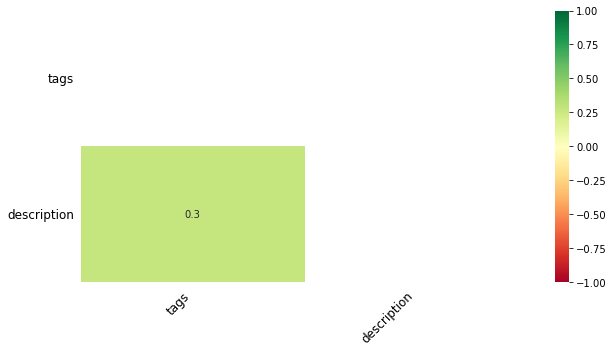

In [136]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

In [137]:
df[(df['tags'].isna() == True) & (df['description'].isna() == True)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
104,kKFNThEiilU,17.22.11,Voices,Doug Jones for Senate,22,2017-11-21T02:30:47.000Z,NaN,49472,430,155,210,https://i.ytimg.com/vi/kKFNThEiilU/default.jpg,False,False,False,NaN,People & Blogs
119,kKFNThEiilU,17.23.11,Voices,Doug Jones for Senate,22,2017-11-21T02:30:47.000Z,NaN,84038,823,340,486,https://i.ytimg.com/vi/kKFNThEiilU/default.jpg,False,False,False,NaN,People & Blogs
129,mN4JWnTOSmg,17.23.11,Drake - Virginia Black commercial,The Sports King,22,2017-11-19T20:23:56.000Z,NaN,15117,165,4,28,https://i.ytimg.com/vi/mN4JWnTOSmg/default.jpg,False,False,False,NaN,People & Blogs
138,kKFNThEiilU,17.24.11,Voices,Doug Jones for Senate,22,2017-11-21T02:30:47.000Z,NaN,88992,884,376,566,https://i.ytimg.com/vi/kKFNThEiilU/default.jpg,False,False,False,NaN,People & Blogs
147,mN4JWnTOSmg,17.24.11,Drake - Virginia Black commercial,The Sports King,22,2017-11-19T20:23:56.000Z,NaN,20201,213,5,31,https://i.ytimg.com/vi/mN4JWnTOSmg/default.jpg,False,False,False,NaN,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40086,6Y65fxIRs8Q,18.15.01,Big sister reflexes,BrasherN,20,2018-01-12T18:29:53.000Z,NaN,2011949,28587,2163,3371,https://i.ytimg.com/vi/6Y65fxIRs8Q/default.jpg,False,False,False,NaN,Gaming
40090,6Y65fxIRs8Q,18.16.01,Big sister reflexes,BrasherN,20,2018-01-12T18:29:53.000Z,NaN,2542806,34289,2543,3983,https://i.ytimg.com/vi/6Y65fxIRs8Q/default.jpg,False,False,False,NaN,Gaming
40095,6Y65fxIRs8Q,18.17.01,Big sister reflexes,BrasherN,20,2018-01-12T18:29:53.000Z,NaN,2761070,36036,2666,4168,https://i.ytimg.com/vi/6Y65fxIRs8Q/default.jpg,False,False,False,NaN,Gaming
40102,6Y65fxIRs8Q,18.18.01,Big sister reflexes,BrasherN,20,2018-01-12T18:29:53.000Z,NaN,2851205,36668,2734,4209,https://i.ytimg.com/vi/6Y65fxIRs8Q/default.jpg,False,False,False,NaN,Gaming


In [138]:
#Check if NaN values only happen in specific view count of video, since the 'views' is the core of the all variable
df[(df['tags'].isna() == True) & (df['description'].isna() == True)]['views']

104        49472
119        84038
129        15117
138        88992
147        20201
          ...   
40086    2011949
40090    2542806
40095    2761070
40102    2851205
40108    2894540
Name: views, Length: 275, dtype: int64

In [139]:
df[(df['tags'].isna() == True) | (df['description'].isna() == True)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
12,1640fZpYBSY,17.14.11,I love the Price is Right! Wooo! -Kevin,Anaki Abo,22,2017-11-07T18:54:39.000Z,NaN,358597,1211,72,593,https://i.ytimg.com/vi/1640fZpYBSY/default.jpg,False,False,False,Price is Right contestant plays for a car.,People & Blogs
15,wRGldR_SQAA,17.14.11,Apple Clips sample,Steve Kovach,22,2017-11-09T18:01:04.000Z,NaN,2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and special effects featuring Star Wars characters.,People & Blogs
24,Fyyua5JzD9w,17.15.11,Baby loves Jeopardy!,Daelric,22,2017-11-10T17:57:59.000Z,NaN,48372,382,11,29,https://i.ytimg.com/vi/Fyyua5JzD9w/default.jpg,False,False,False,"My 13-month old loves Jeopardy. He doesn't do this for anything else on TV!\n\nFor licensing or usage, contact licensing@viralhog.com",People & Blogs
33,Jidk0O6uu-0,17.16.11,Granulated Sugar From Honey,Cody'sLab Backup,22,2017-11-15T07:25:03.000Z,NaN,52607,3835,32,351,https://i.ytimg.com/vi/Jidk0O6uu-0/default.jpg,False,False,False,I use a power juicer to separate the crystals out of honey that has hardened,People & Blogs
41,Fyyua5JzD9w,17.16.11,Baby loves Jeopardy!,Daelric,22,2017-11-10T17:57:59.000Z,NaN,49915,386,11,24,https://i.ytimg.com/vi/Fyyua5JzD9w/default.jpg,False,False,False,"My 13-month old loves Jeopardy. He doesn't do this for anything else on TV!\n\nFor licensing or usage, contact licensing@viralhog.com",People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40809,mt22NvsTRG0,18.16.01,The Obama Presidential Center: Where We Are Now,Obama Foundation,29,2018-01-12T19:17:22.000Z,NaN,73649,2721,122,74,https://i.ytimg.com/vi/mt22NvsTRG0/default.jpg,False,False,False,"One year ago, President and Mrs. Obama laid out their vision for the Obama Presidential Center: a living, working campus for citizenship that will inspire and empower visitors and residents to create change in their communities and the world. Now, we're taking a big step in realizing that vision by creating a cultural destination in Jackson Park and an economic engine for the South Side and City of Chicago. Learn more at obama.org/the-center.",Nonprofits & Activism
40818,ZYKUXMAou3Q,18.02.02,Rose McGowan Shares Her Thoughts On 'Time's Up' Movement | The View,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""|""The View""|""feminism""|""women's rights""|""hot topics""|""Harvey Weinstein""|""Hollywood""",225051,3075,702,1439,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,Nonprofits & Activism
40819,ZYKUXMAou3Q,18.04.02,Rose McGowan Shares Her Thoughts On 'Time's Up' Movement | The View,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""|""The View""|""feminism""|""women's rights""|""hot topics""|""Harvey Weinstein""|""Hollywood""",267065,3527,769,1280,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,Nonprofits & Activism
40820,ZYKUXMAou3Q,18.05.02,Rose McGowan Shares Her Thoughts On 'Time's Up' Movement | The View,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""|""The View""|""feminism""|""women's rights""|""hot topics""|""Harvey Weinstein""|""Hollywood""",281983,3683,784,1365,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,Nonprofits & Activism


In [140]:
df[(df['tags'].isna() == True) | (df['description'].isna() == True)]['views']

12       358597
15         2259
24        48372
33        52607
41        49915
          ...  
40809     73649
40818    225051
40819    267065
40820    281983
40821    295068
Name: views, Length: 1828, dtype: int64

#### Eventhough correlation between NaN values is 0.3 (weak correlation) and spread randomly, if we drop the rows which contain the NaN values, it will drop 1828 rows (including 275 rows contains both columns NaN values) with videos that have views more than 2 millions. It will be better if we just replace the NaN values with string that represent no value.

#### Before do the replacement of NaN values, we need to notice that tags and description can be related to view since if both of them done correctly, it can raise the video's view when the viewers search the video with keyword related to title/tags/description. 

#### So, let's just keep these rows value not impacting the analysis by create columns which count description & tags length. 

### 2d. Feature Engineering for Missing Value

In [141]:
# Make column that contain length of description and length of tags
df['description_length'] = df['description'].str.len()
df['tags_length'] = df['tags'].str.len()
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,description_length,tags_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,1410.0,15.0


In [142]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                      1534
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                569
category                     0
description_length         569
tags_length               1534
dtype: int64

#### The 'description_length' and 'tags_length' columns are containing same missing values as the 'tags' and 'description', let's just replace it with 0

In [143]:
df['description_length'] = df['description_length'].fillna(0).astype(int)
df['tags_length'] = df['tags_length'].fillna(0).astype(int)
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                      1534
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                569
category                     0
description_length           0
tags_length                  0
dtype: int64

#### As we can see, for the value of 'description_length' and 'tags_length' are already keeped for being valid
#### Now, replace the NaN values in 'tags' and 'description' with some string

In [144]:
df=df.fillna('None')
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category                  0
description_length        0
tags_length               0
dtype: int64

In [145]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,description_length,tags_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,1410,15


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  de

### 2e. Recasting Data Format and Adding Related Columns

#### From the data information, we can see that there are some columns' datatype which need to be recasted. We also need to add some column which related to the analysis in future that related such as trending age, video temperature etc. 

#### For the 'trending date' and 'publish_time' column should not in object datatype, we need to recasting these first to date and time datatype. 

##### Recasting 'publish_date'

##### Import Library for recasting date and time 

In [147]:
from datetime import datetime

##### Recasting for 'trending_date' to datetime common format

In [148]:
df['trending_date']=pd.to_datetime(df['trending_date'].astype(str),format='%y.%d.%m')
df['trending_date']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40896   2018-06-02
40897   2018-06-03
40898   2018-06-04
40899   2018-06-05
40900   2018-06-06
Name: trending_date, Length: 40901, dtype: datetime64[ns]

##### Recasting for 'publish_date' in common datetime format based on 'publish_time' column

In [149]:
df['publish_date'] = pd.to_datetime(df['publish_time']).dt.date
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['publish_date']

0       2017-11-13
1       2017-04-21
2       2017-11-11
3       2017-11-11
4       2017-11-11
           ...    
40896   2018-05-10
40897   2018-05-10
40898   2018-05-10
40899   2018-05-10
40900   2018-05-10
Name: publish_date, Length: 40901, dtype: datetime64[ns]

##### Make new column: 'publish_day' for get more insight about the publish day

In [150]:
#reference: https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
def day(date):
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=date.weekday()
    return days[dayNumber]
df['publish_day'] = df['publish_date'].apply(day)
df['publish_day']

0          Monday
1          Friday
2        Saturday
3        Saturday
4        Saturday
           ...   
40896    Thursday
40897    Thursday
40898    Thursday
40899    Thursday
40900    Thursday
Name: publish_day, Length: 40901, dtype: object

##### Recasting to make 'publish_hour' to know the hour video published, because it is necessary to know the prime time hour

In [151]:
df['publish_hour'] = pd.to_datetime(df['publish_time']).dt.hour
df['publish_hour']

0        17
1         6
2        15
3        18
4         1
         ..
40896    21
40897    21
40898    21
40899    21
40900    21
Name: publish_hour, Length: 40901, dtype: int64

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  int64         
 5   publish_time            40901 non-null  object        
 6   tags                    40901 non-null  object        
 7   views                   40901 non-null  int64         
 8   likes                   40901 non-null  int64         
 9   dislikes                40901 non-null  int64         
 10  comment_count           40901 non-null  int64         
 11  thumbnail_link          40901 non-null  object        
 12  comments_disabled       40901 non-null  bool  

#### Now, let's make the column for video age when it's trending

In [153]:
df['video_age_trending']=df['trending_date']-df['publish_date']
df['video_age_trending']=df['video_age_trending'].dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  int64         
 5   publish_time            40901 non-null  object        
 6   tags                    40901 non-null  object        
 7   views                   40901 non-null  int64         
 8   likes                   40901 non-null  int64         
 9   dislikes                40901 non-null  int64         
 10  comment_count           40901 non-null  int64         
 11  thumbnail_link          40901 non-null  object        
 12  comments_disabled       40901 non-null  bool  

In [154]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,category,description_length,tags_length,publish_date,publish_day,publish_hour,video_age_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,1410,15,2017-11-13,Monday,17,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,False,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs,102,25,2017-04-21,Friday,6,207
2,STI2fI7sKMo,2017-11-14,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,...,False,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs,630,534,2017-11-11,Saturday,15,3
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,...,False,False,"Molly is an god damn amazing human and she challenged me to a blind cake decorating contest! Wh

#### We need to make column video_temperature to represent the video temperature (it's capability to how quick the video gain the video views) by divide the video views with video age

In [155]:
df['video_temperature']= df['views']/df['video_age_trending']
df['video_temperature']= df['video_temperature'].round()
df['video_temperature']

0        748374.0
1           478.0
2        107018.0
3         65687.0
4        914810.0
           ...   
40896     57586.0
40897     55510.0
40898     53602.0
40899     51734.0
40900     50049.0
Name: video_temperature, Length: 40901, dtype: float64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  int64         
 5   publish_time            40901 non-null  object        
 6   tags                    40901 non-null  object        
 7   views                   40901 non-null  int64         
 8   likes                   40901 non-null  int64         
 9   dislikes                40901 non-null  int64         
 10  comment_count           40901 non-null  int64         
 11  thumbnail_link          40901 non-null  object        
 12  comments_disabled       40901 non-null  bool  

In [157]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,category,description_length,tags_length,publish_date,publish_day,publish_hour,video_age_trending,video_temperature
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,1410,15,2017-11-13,Monday,17,1,748374.0


In [158]:
display(df.describe(),df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count,description_length,tags_length,publish_hour,video_age_trending,video_temperature
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04,40901.000000,40901.000000,40901.000000,40901.000000,40901.0
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03,1031.331899,275.565830,13.764945,16.826850,inf
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04,854.927811,170.079486,6.426401,146.099164,NaN
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02,419.000000,119.000000,10.000000,3.000000,47694.0
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03,826.000000,264.000000,15.000000,5.000000,130521.0
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03,1388.000000,445.000000,18.000000,9.000000,354283.0
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,5123.000000,628.000000,23.000000,4215.000000,inf


,video_id,title,channel_title,publish_time,tags,thumbnail_link,description,category,publish_day
count,40901,40901,40901,40901,40901,40901,40901,40901,40901
unique,6343,6343,2207,6269,6055,6352,6902,16,7
top,XiHiW4N7-bo,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,None,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,None,Entertainment,Friday
freq,29,29,202,50,1534,29,569,9944,6988


### 2f. Post Cleaning (Filtering Data By View Count)

### According to some sources whom tells that there are minimum requirements for YouTube Video View Count from at least 10k-500k views for becoming in Trending list, we need to filter this data.

#### Source:
##### https://www.tubefilter.com/2019/05/29/youtube-views-to-get-on-trending-tab-how-does-trending-work/
##### https://www.theverge.com/2019/5/29/18642833/youtube-trending-coffee-break-pewdiepie-late-night-sports-highlights
### As we can see, the minimum view count on this list is only about 500 views which needs to be filtered.

### Firstly, we need to know how the minimum view count data for going on YouTube Trending is distributed to considering for the minimum view to filter this data. 

#### Check the view count data distribution.

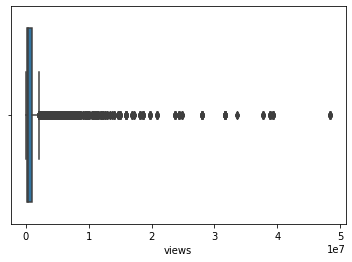

In [159]:
df_views_min = df.groupby('video_id')['views'].transform('min')
sns.boxplot(x = df_views_min)

#### From the graph above, we can see that the data doesn't distributed normally with view counts from around 100k counted as outlier which doesn't relevant with the study source and real practice.
#### Let's just use the 25% value from descriptive statistics of view when videos got trending for decide the minimum views.

In [160]:
df['views'].describe()

count    4.090100e+04
mean     2.360678e+06
std      7.397719e+06
min      5.490000e+02
25%      2.419720e+05
50%      6.810640e+05
75%      1.821926e+06
max      2.252119e+08
Name: views, dtype: float64

#### We see that 1.387150e+05 (138.715 views) is the minimum value that we need to filter the data. However, since the research source said that videos can be trending with 10k in some case, let's take the filter the view with the mid value between 10k and 138k which is 74k. 
#### Now, let's filter the data.

In [161]:
# df[(df['views']< 74000)] #6620 rows (16% of 40900 rows)
#filtering
df=df[df_views_min> 74000]
df=df.reset_index().drop(columns = 'index')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,category,description_length,tags_length,publish_date,publish_day,publish_hour,video_age_trending,video_temperature
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,1410,15,2017-11-13,Monday,17,1,748374.0
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,False,Kittens come out of the eggs in a Thai commercial\n\nReuploaded from Youku since original was deleted.,People & Blogs,102,25,2017-04-21,Friday,6,207,478.0
2,STI2fI7sKMo,2017-11-14,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,...,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs,630,534,2017-11-11,Saturday,15,3,107018.0
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,...,False,"Molly is an god damn amazing human and she challenged me to a blind cake decorating contest! W

In [162]:
display(df.describe(),df.describe(include='object'))

,category_id,views,likes,dislikes,comment_count,description_length,tags_length,publish_hour,video_age_trending,video_temperature
count,34281.000000,3.428100e+04,3.428100e+04,3.428100e+04,3.428100e+04,34281.000000,34281.000000,34281.000000,34281.000000,34281.0
mean,19.922814,2.796231e+06,8.812130e+04,4.377716e+03,1.000132e+04,1074.925061,284.458446,13.807123,9.135527,inf
std,7.559897,8.007178e+06,2.477491e+05,3.167263e+04,4.072444e+04,861.964146,168.053850,6.352557,72.906679,NaN
min,1.000000,7.407800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,25.0
25%,15.000000,3.991570e+05,1.009600e+04,3.320000e+02,1.026000e+03,460.000000,131.000000,11.000000,3.000000,77402.0
50%,23.000000,9.270890e+05,2.493100e+04,8.680000e+02,2.593000e+03,868.000000,280.000000,15.000000,6.000000,173344.0
75%,25.000000,2.219440e+06,7.062700e+04,2.427000e+03,7.264000e+03,1427.000000,451.000000,18.000000,9.000000,427849.0
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,5123.000000,624.000000,23.000000,4215.000000,inf


,video_id,title,channel_title,publish_time,tags,thumbnail_link,description,category,publish_day
count,34281,34281,34281,34281,34281,34281,34281,34281,34281
unique,4865,4865,1541,4816,4709,4873,5407,16,7
top,XiHiW4N7-bo,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,The Tonight Show Starring Jimmy Fallon,2018-05-18T14:00:04.000Z,None,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,None,Entertainment,Thursday
freq,29,29,194,50,1047,29,331,8425,5972


### Now, the raw data already processed. It is now ready for analyzed.

## Export The Cleaned Video

In [163]:
# df.to_csv('YT_USvideos_cleaned.csv', index=False)

# Phase 4: Analysis Data

### Now, after cleaning & understand what data that we have and represent of, also we already know some factors that determines video become trending, we can answer the problems that needed to be solved.

### First, let's breakdown the problem into specific question by the trending determining factors with the variabel that we got from datas (views, likes, dislikes, comments, description box, tags, video age and temperature):
### 1. What are the factors that makes videos become trending on Youtube?

#### 1a. How are the correlation of video age to view counts, likes, dislikes and comment?
#### 1b. How high is the temperature and how is the correlation of temperature with the video age when video become trending?
#### 1c. What day and time that videos published most when it trending?
#### 1e. What are the top category that showed in trending?

## 4.1 Analyze the factors that makes the videos to become trending on Youtube

### Videos that easier to become trending are the ones which have the least number of age to trending, to analyze this, let's filter the data based on the videos' age when trending

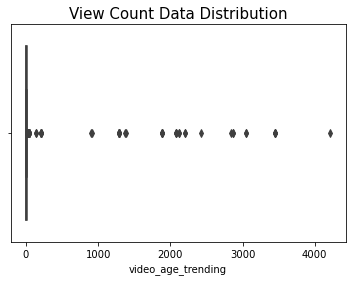

In [164]:
sns.boxplot(data = df, x = 'video_age_trending')
plt.title('View Count Data Distribution',size=15)
plt.show()

#### From the boxplot above, it's clear that there are so many outlier (Not Normal Distribution).

### In data descriptive information,  it is known that the median are about 2 days and 9 days in mean. Let's just filter it by 14 because we want maximum 14 days of trending age.

In [165]:
df=df[(df['video_age_trending']< 14)].reset_index().drop(columns={'index'})
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,category,description_length,tags_length,publish_date,publish_day,publish_hour,video_age_trending,video_temperature
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,People & Blogs,1410,15,2017-11-13,Monday,17,1,748374.0
1,STI2fI7sKMo,2017-11-14,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shawn and andrew""|""olympian""|""nfl player""|""athletes""|""vlog""|""couples""|""google irl""|""google feud""|""google markiplier""|""google myself""|""challenge""|""reactions""|""reacts""|""internet""|""memes""|""funny""|""birthday""|""cringe""|""laughing""|""daily""|""vlogger""|""stupid""|""cute""|""boy""|""diy""|""google""|""myself""|""googled""|""googling""|""liza""|""lizakoshy""|""wednesdays""|""liza koshy""|""googling myself""|""liza koshy net worth""|""liza koshy google""|""liza facts""|""liza panties""|""net worth""|""youtuber net worth""|""youtuber facts""",321053,4451,1772,...,False,"Subscribe for weekly videos ▶ http://bit.ly/sjofficoak\n\nDon't believe everything you read.\n\nFAN MAIL ADDRESS: \nShawn and Andrew East\n750 N San Vicente Blvd., \nEast Tower, 11th Floor, \nLos Angles, CA 90069\n\nFollow My Instagram ▶ http://www.instagram.com/ShawnJohnson\nLike the Facebook page! ▶ http://www.facebook.com/ShawnJohnson\nFollow My Twitter ▶ http://www.twitter.com/ShawnJohnson\nSnapchat! ▶ @ShawneyJ\n\nFollow AndrewsTwitter ▶ http://www.twitter.com/AndrewDEast\nFollow My Instagram ▶ http://www.instagram.com/AndrewDEast\nLike the Facebook page! ▶ http://www.facebook.com/AndrewDEast\nSnapchat! ▶ @AndrewDEast",People & Blogs,630,534,2017-11-11,Saturday,15,3,107018.0
2,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Molly Burke) // Grace Helbig,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helbig""|""gracehelbig""|""dailygrace""|""daily""|""tutorial""|""diy""|""lifestyle""",197062,7250,217,...,False,"Molly is an god damn amazing human and she challenged me to a blind cake decorating contest! Who do you think won? (YES, I AGREE THAT MOLLY DEFINITELY WON)\nWatch the video we made on her channel and subscribe!\nhttps://www.youtube.com/user/MollyBurkeOfficial\n\nSnapChat: GraceHelbig\nhttp://twitter.com/gracehelbig\nhttp://gracehelbig.tumblr.com\nhttp://instagram.com/gracehelbig\nhttp://

### Re-Check Data Distribution

#### Now, we are going to check every related column distribution data, first we start with trending video age .

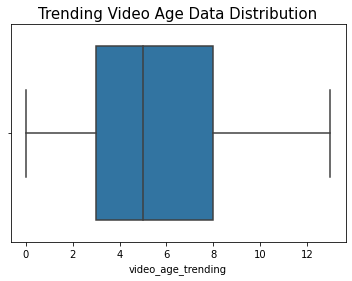

In [166]:
sns.boxplot(data = df, x = 'video_age_trending')
plt.title('Trending Video Age Data Distribution',size=15)
plt.show()

In [167]:
from scipy.stats import normaltest

stats, pvalue=normaltest(df['video_age_trending'])
if pvalue<=0.05:
    print(f'does not distributed normally, pval = {pvalue}')       
else: 
    print(f'distributed normally, pval = {pvalue}') 

does not distributed normally, pval = 0.0


#### Data distribution check for views column.

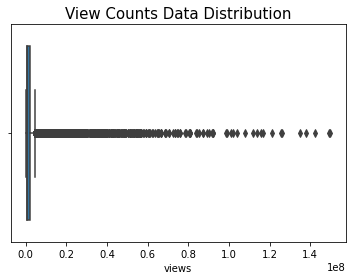

In [168]:
sns.boxplot(data = df, x = 'views')
plt.title('View Counts Data Distribution',size=15)
plt.show()

In [169]:
from scipy.stats import normaltest

stats, pvalue=normaltest(df['views'])
if pvalue<=0.05:
    print(f'does not distributed normally, pval = {pvalue}')       
else: 
    print(f'distributed normally, pval = {pvalue}') 

does not distributed normally, pval = 0.0


#### Data distribution check for likes column.

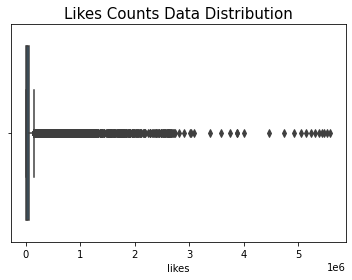

In [170]:
sns.boxplot(data = df, x = 'likes')
plt.title('Likes Counts Data Distribution',size=15)
plt.show()

In [171]:
from scipy.stats import normaltest

stats, pvalue=normaltest(df['likes'])
if pvalue<=0.05:
    print(f'does not distributed normally, pval = {pvalue}')       
else: 
    print(f'distributed normally, pval = {pvalue}') 

does not distributed normally, pval = 0.0


#### Data distribution check for dislikes column.

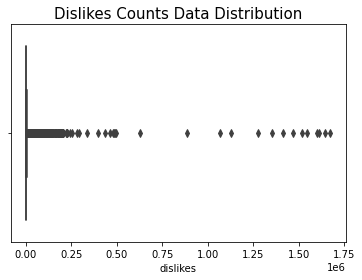

In [172]:
sns.boxplot(data = df, x = 'dislikes')
plt.title('Dislikes Counts Data Distribution',size=15)
plt.show()

In [173]:
from scipy.stats import normaltest

stats, pvalue=normaltest(df['dislikes'])
if pvalue<=0.05:
    print(f'does not distributed normally, pval = {pvalue}')       
else: 
    print(f'distributed normally, pval = {pvalue}') 

does not distributed normally, pval = 0.0


#### Data distribution check for comment column.

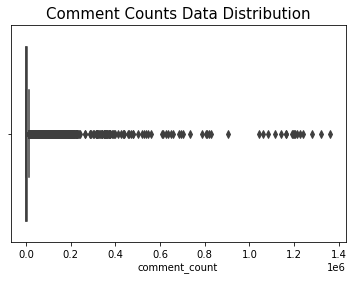

In [174]:
sns.boxplot(data = df, x = 'comment_count')
plt.title('Comment Counts Data Distribution',size=15)
plt.show()

In [175]:
from scipy.stats import normaltest

stats, pvalue=normaltest(df['comment_count'])
if pvalue<=0.05:
    print(f'does not distributed normally, pval = {pvalue}')       
else: 
    print(f'distributed normally, pval = {pvalue}') 

does not distributed normally, pval = 0.0


## Data Visualization 

### Data visualization to show the correlation between video trending factors.

### 1a. How is the correlation between factors?

In [191]:
df_corr=df[['views', 'likes', 'dislikes', 'comment_count','description_length', 'tags_length','video_age_trending','video_temperature']].corr(method='spearman')
df_corr

,views,likes,dislikes,comment_count,description_length,tags_length,video_age_trending,video_temperature
views,1.000000,0.789813,0.801926,0.732788,0.014470,0.039436,0.241781,0.832265
likes,0.789813,1.000000,0.718324,0.834797,0.069491,-0.006550,0.160103,0.681605
dislikes,0.801926,0.718324,1.000000,0.781867,0.024538,0.032085,0.165164,0.688310
comment_count,0.732788,0.834797,0.781867,1.000000,0.079625,0.031765,0.116878,0.650780
description_length,0.014470,0.069491,0.024538,0.079625,1.000000,0.411920,0.014672,0.009324
tags_length,0.039436,-0.006550,0.032085,0.031765,0.411920,1.000000,-0.006853,0.042314
video_age_trending,0.241781,0.160103,0.165164,0.116878,0.014672,-0.006853,1.000000,-0.292829
video_temperature,0.832265,0.681605,0.688310,0.650780,0.009324,0.042314,-0.292829,1.000000


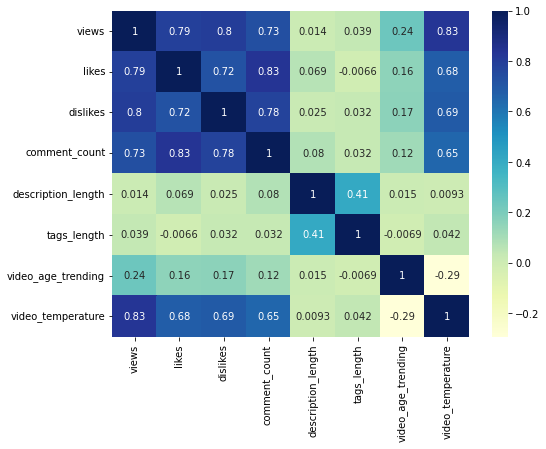

In [192]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,annot = True,cmap='YlGnBu')
plt.savefig('heatmap_overall.png')
plt.show()

In [193]:
df_corr2=df[['views', 'likes', 'dislikes', 'comment_count','description_length', 'tags_length','video_age_trending','video_temperature']].corr(method='spearman')[['video_age_trending']]
df_corr2

,video_age_trending
views,0.241781
likes,0.160103
dislikes,0.165164
comment_count,0.116878
description_length,0.014672
tags_length,-0.006853
video_age_trending,1.000000
video_temperature,-0.292829


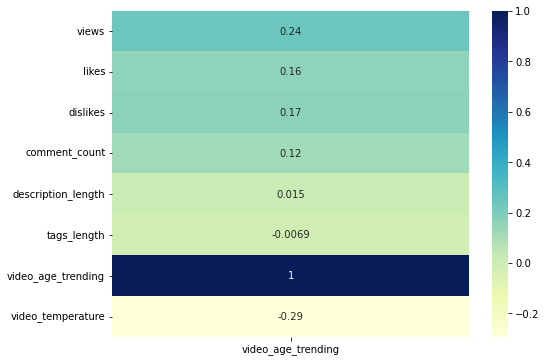

In [194]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr2,annot = True,cmap='YlGnBu')
plt.savefig('heatmap_fix.png')
plt.show()

#### As we can see, besides the correlation between video_age and other factors maximum only in 0.29 with temperature. Temperature as a value which from views divided age has stronger correlation with views (0.83). From here, we can see that the most influential factors for trending video is view count.

In [201]:
view_vs_age = df.groupby('video_age_trending')['views'].median().round().reset_index().rename(columns = {'video_age_trending':'Age','views':'Number of Views'})
view_vs_age['Number of Views'].median() #934497.5
view_vs_age['Number of Views'].sum() #12940608
view_vs_age['Number of Views']

0      441105
1      419781
2      611006
3      710584
4      766437
5      785476
6      857768
7     1011227
8     1098588
9     1119284
10    1175625
11    1224103
12    1292277
13    1427347
Name: Number of Views, dtype: int64

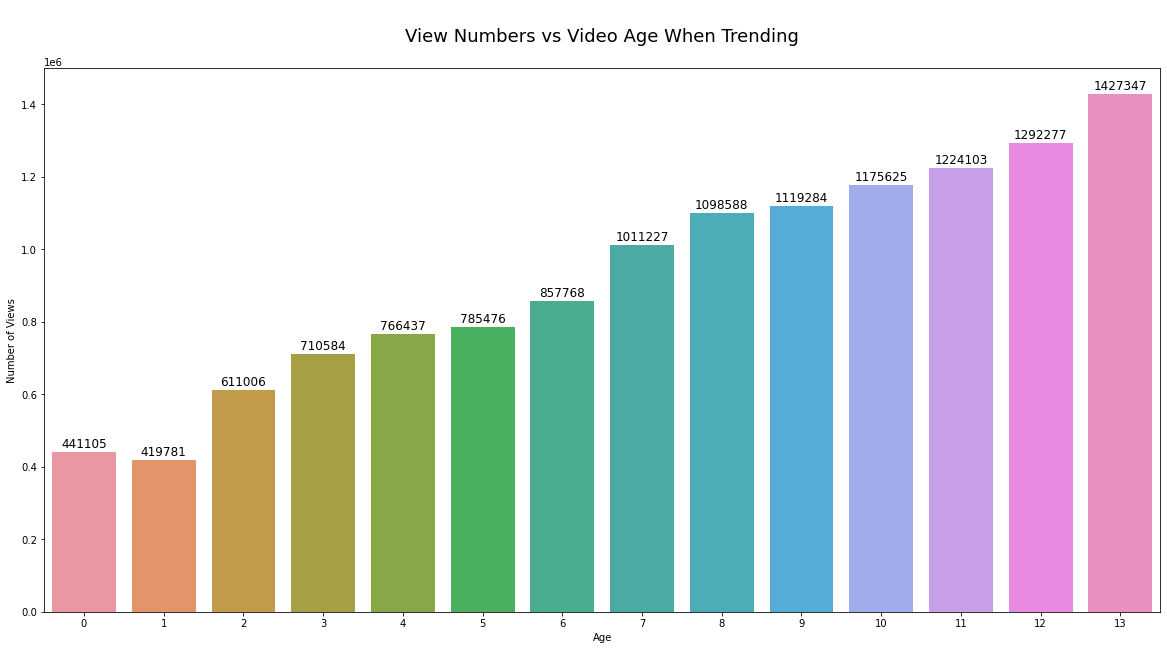

In [177]:
plt.figure(figsize=(20, 10))
plt.title('\nView Numbers vs Video Age When Trending\n', size=18)


plots = sns.barplot(data = view_vs_age, x='Age', y='Number of Views')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.savefig('view_age.png')
plt.show()

#### Views number trend increased gradually according to age video, it means the videos viewed  not only once for. However, it is the one factor that will affect other factor since it is linked with temperature, video performance and interaction factor (like, dislike etc.)

#### Visualizing Correlation Between Age vs Video Like Count

In [203]:
like_vs_age = df.groupby('video_age_trending')['likes'].median().round().reset_index().rename(columns={'video_age_trending':'Age','likes':'Number of Likes'})
like_vs_age.sum()
like_vs_age.median()
like_vs_age

Age                    6.5
Number of Likes    24251.0
dtype: float64

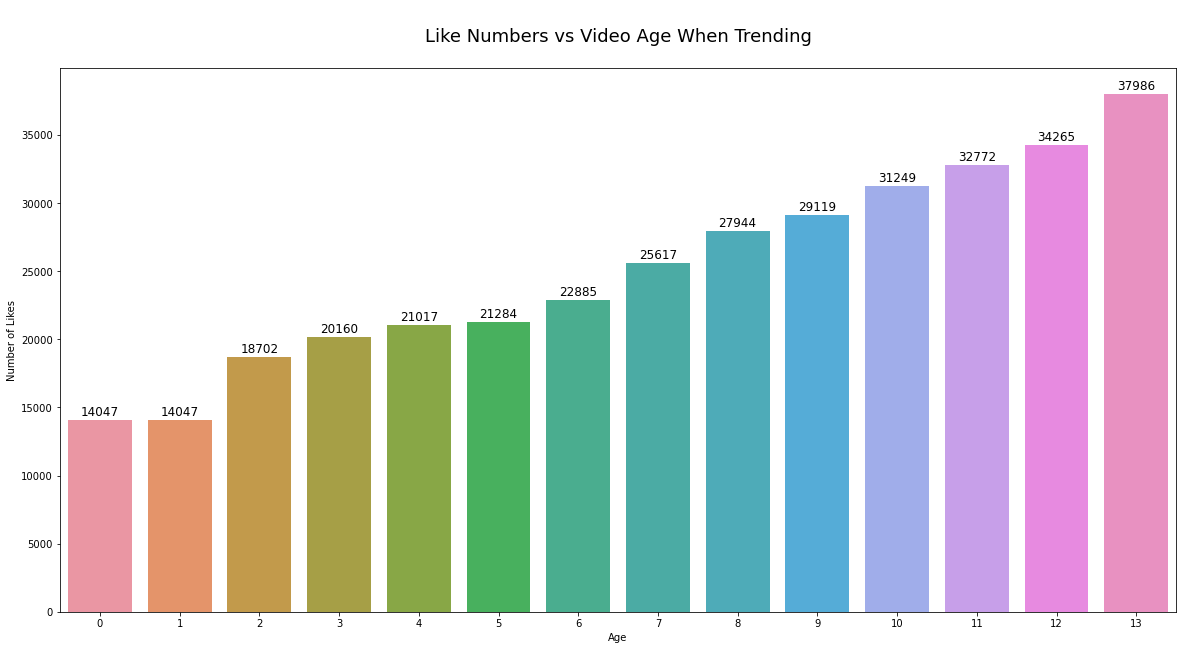

In [179]:
plt.figure(figsize=(20, 10))
plt.title('\nLike Numbers vs Video Age When Trending\n', size=18)


plots = sns.barplot(data = like_vs_age, x='Age', y='Number of Likes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.savefig('like_age.png')
plt.show()

#### Visualizing Correlation Between Age vs Video Dislike Count

In [204]:
dislike_vs_age = df.groupby('video_age_trending')['dislikes'].median().round().reset_index().rename(columns={'video_age_trending':'Age','dislikes':'Number of Dislikes'})
print(dislike_vs_age.sum())
print(dislike_vs_age.median())
dislike_vs_age

Age                      91
Number of Dislikes    12343
dtype: int64
Age                     6.5
Number of Dislikes    860.5
dtype: float64


,Age,Number of Dislikes
0,0,528
1,1,467
2,2,629
3,3,701
4,4,734
5,5,743
6,6,805
7,7,916
8,8,1000
9,9,1032


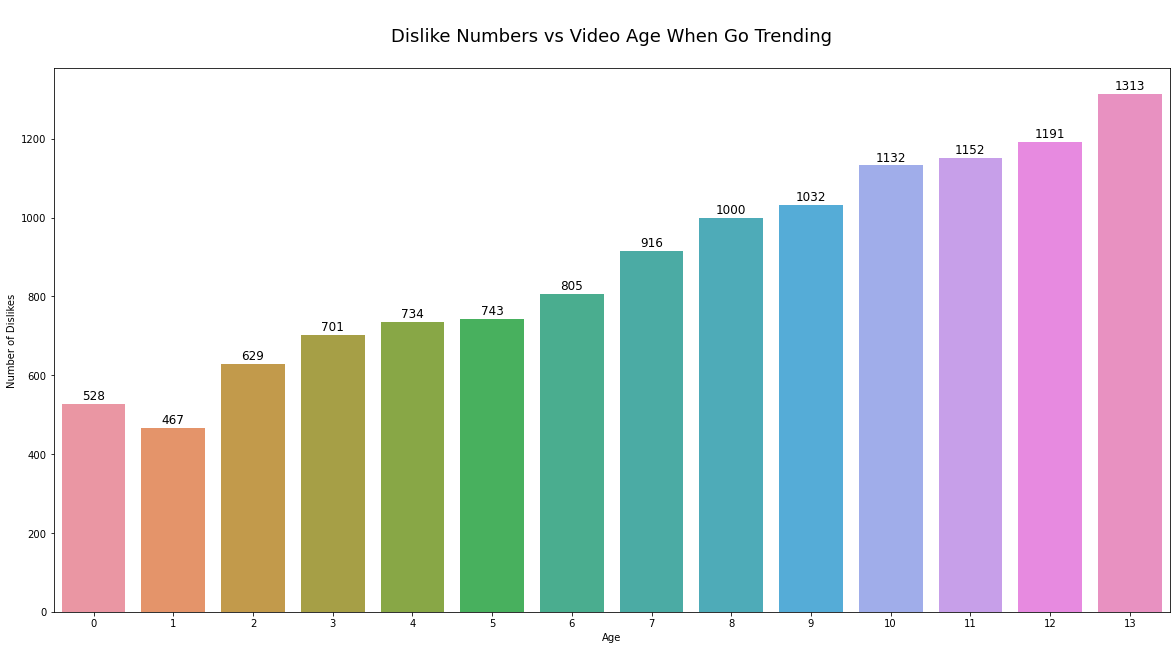

In [181]:
plt.figure(figsize=(20, 10))
plt.title('\nDislike Numbers vs Video Age When Go Trending\n', size=18)


plots = sns.barplot(data = dislike_vs_age, x='Age', y='Number of Dislikes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.savefig('dislike_age.png')
plt.show()

#### Visualizing Correlation Between Age vs Video Comment Count

In [205]:
comments_vs_age = df.groupby('video_age_trending')['comment_count'].median().round().reset_index().rename(columns={'video_age_trending':'Age','comment_count':'Number of Comments'})
print(comments_vs_age.sum())
print(comments_vs_age.median())
comments_vs_age

Age                      91.0
Number of Comments    36091.0
dtype: float64
Age                      6.5
Number of Comments    2494.0
dtype: float64


,Age,Number of Comments
0,0,1373.0
1,1,1721.0
2,2,2113.0
3,3,2273.0
4,4,2222.0
5,5,2195.0
6,6,2334.0
7,7,2654.0
8,8,2795.0
9,9,2883.0


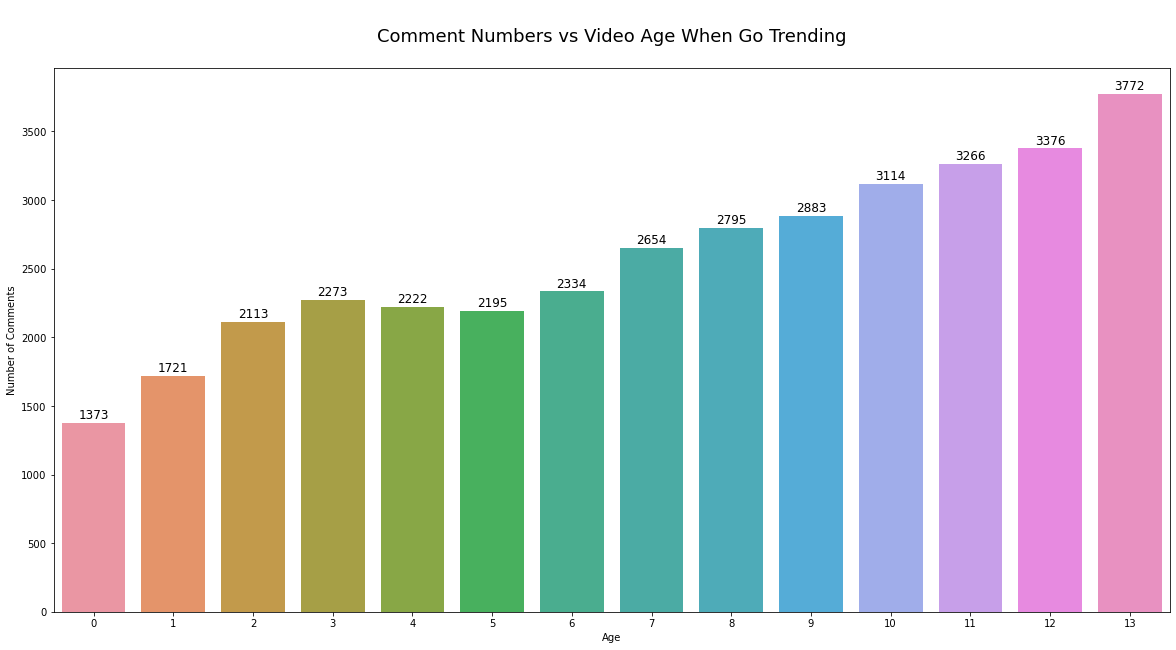

In [197]:
plt.figure(figsize=(20, 10))
plt.title('\nComment Numbers vs Video Age When Go Trending\n', size=18)


plots = sns.barplot(data = comments_vs_age, x='Age', y='Number of Comments')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.savefig('comment_age.png')
plt.show()

#### Surprisingly, all of the 3 interaction factors (Like, Dislike and Comment Count) have same pattern and trend which grow gradually along with the age of video, it means that the trending videos have much interaction like comment, like, dislike etc.

### 1b. How high is the temperature and how's the correlation between video age to temperature?

In [184]:
age_vs_temp = df.groupby('video_age_trending')['video_temperature'].median().round().reset_index().rename(columns={'video_age_trending':'Age','video_temperature':'Temperature (Likes/Day)'})
age_vs_temp

,Age,Temperature (Likes/Day)
0,0,inf
1,1,419781.0
2,2,305503.0
3,3,236862.0
4,4,191609.0
5,5,157095.0
6,6,142961.0
7,7,144461.0
8,8,137324.0
9,9,124365.0


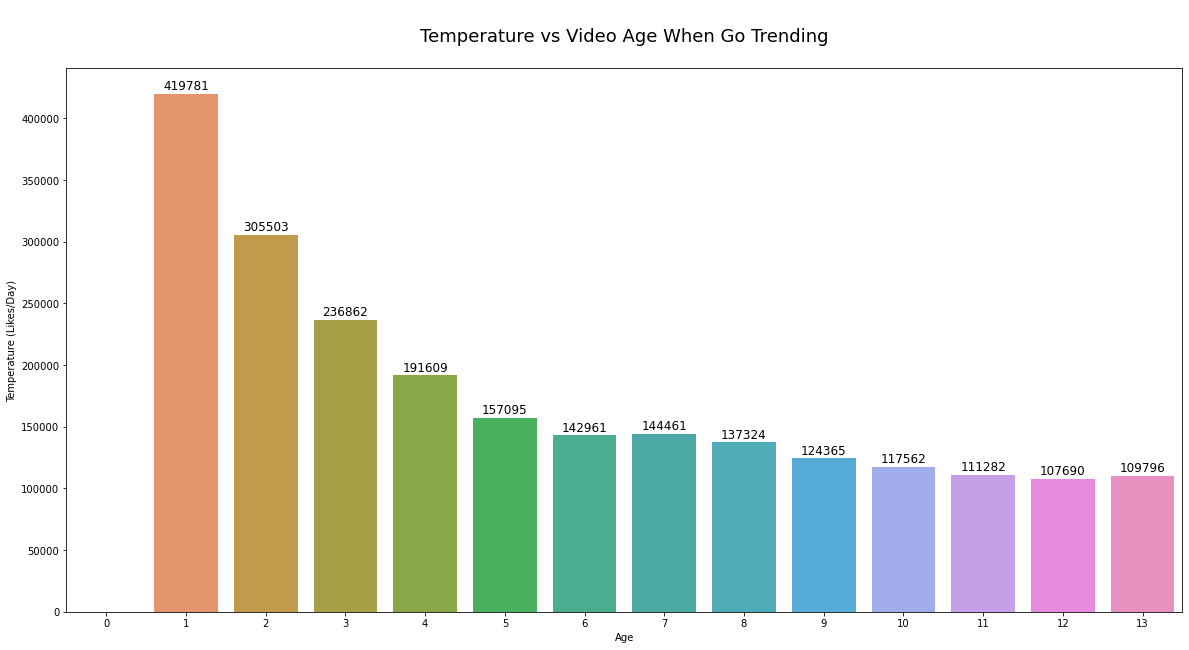

In [185]:
plt.figure(figsize=(20, 10))
plt.title('\nTemperature vs Video Age When Go Trending\n', size=18)


plots = sns.barplot(data = age_vs_temp, x='Age', y='Temperature (Likes/Day)')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.savefig('temp_age.png')
plt.show()

#### For the day 0 (before one day trending) temperature can't be read since the video age is its divider. 
#### However, we can see that temperature gradually decreased along the video trending age which shows that for the time to gain the highest temperature are on the beginning period after posting, in this period it also can be supported by using other feature such as YouTube ads etc.

### 1c. What day and time that videos published most when it trending?

In [186]:
# age_vs_temp = df.groupby('video_age_trending')['video_temperature'].median().round().reset_index().rename(columns={'video_age_trending':'Age','video_temperature':'Temperature (Likes/Day)'})
# age_vs_temp
daypublish=df.groupby('publish_day')['category'].count().reset_index().rename(columns={'category':'Count','publish_day':'Day'})
daypublish

,Day,Count
0,Friday,5072
1,Monday,4610
2,Saturday,2712
3,Sunday,2829
4,Thursday,5263
5,Tuesday,4960
6,Wednesday,5050


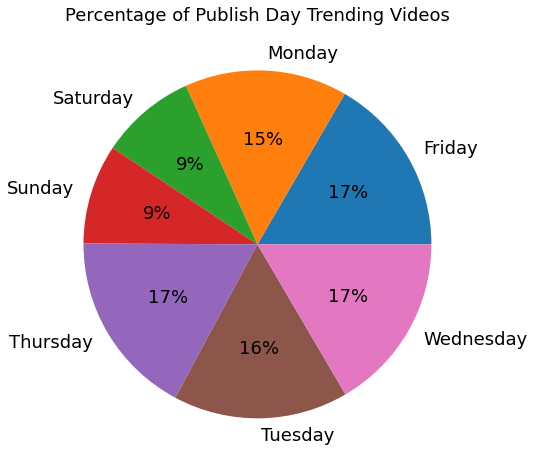

In [187]:
plt.figure(figsize=(12,8),facecolor='white')
plt.title('Percentage of Publish Day Trending Videos', size=18)
plt.pie(
    x= daypublish['Count'],            
    labels= daypublish['Day'],    
    autopct='%1.f%%',                   
    textprops={'fontsize': 18}
)
plt.savefig('pie_day.png')
plt.show()

In [188]:
hourpublish=df.groupby('publish_hour')['video_age_trending'].count().reset_index().rename(columns={'video_age_trending':'Count','publish_hour':'Hour'})
hourpublish

,Hour,Count
0,0,1048
1,1,994
2,2,682
3,3,687
4,4,907
5,5,956
6,6,407
7,7,520
8,8,619
9,9,462


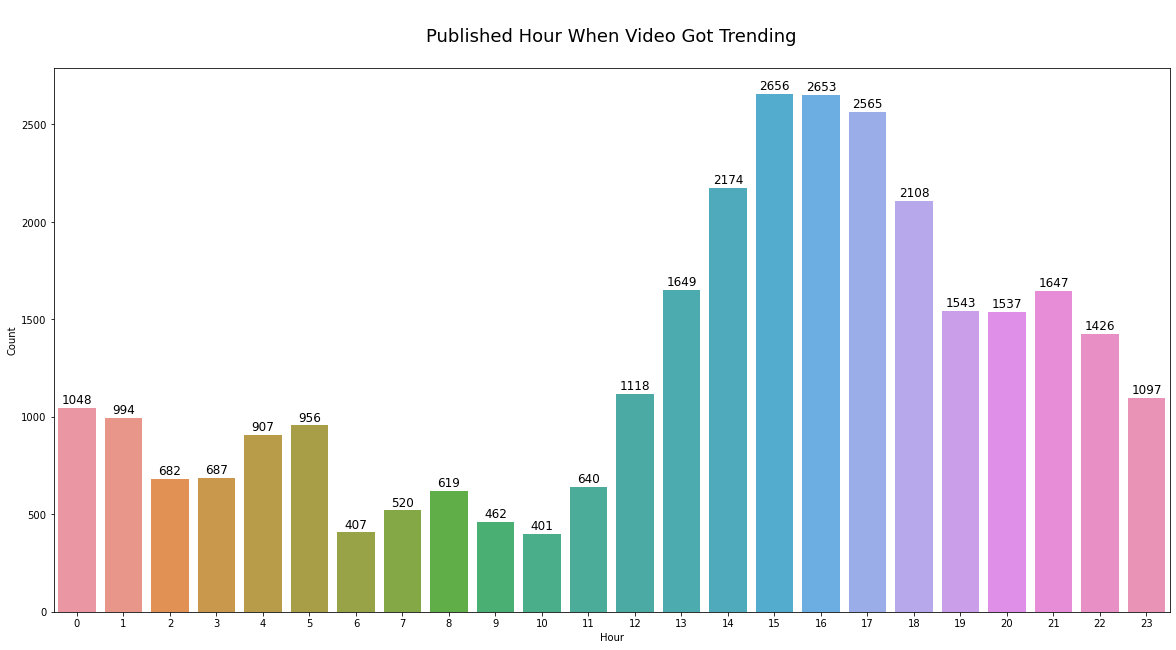

In [189]:
plt.figure(figsize=(20, 10))
plt.title('\nPublished Hour When Video Got Trending\n', size=18)


plots = sns.barplot(data = hourpublish, x='Hour', y='Count')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.savefig('published_hour.png')
plt.show()

#### The most used publish day and hour are on weekday between 15:00-17:00 o'clock which is make sense since that's afternoon which people usually take break on that period. It such a 'prime time'.

### 1.e Data visualization for all video numbers per category

In [195]:
vid_by_cat = df.groupby('category')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'category':'Category','video_id':'Number of Videos'})
vid_by_cat

,Category,Number of Videos
0,Entertainment,7505
1,Music,4721
2,Howto & Style,3127
3,Comedy,2810
4,People & Blogs,2448
5,Science & Technology,1872
6,Sports,1691
7,Film & Animation,1679
8,Education,1398
9,News & Politics,1361


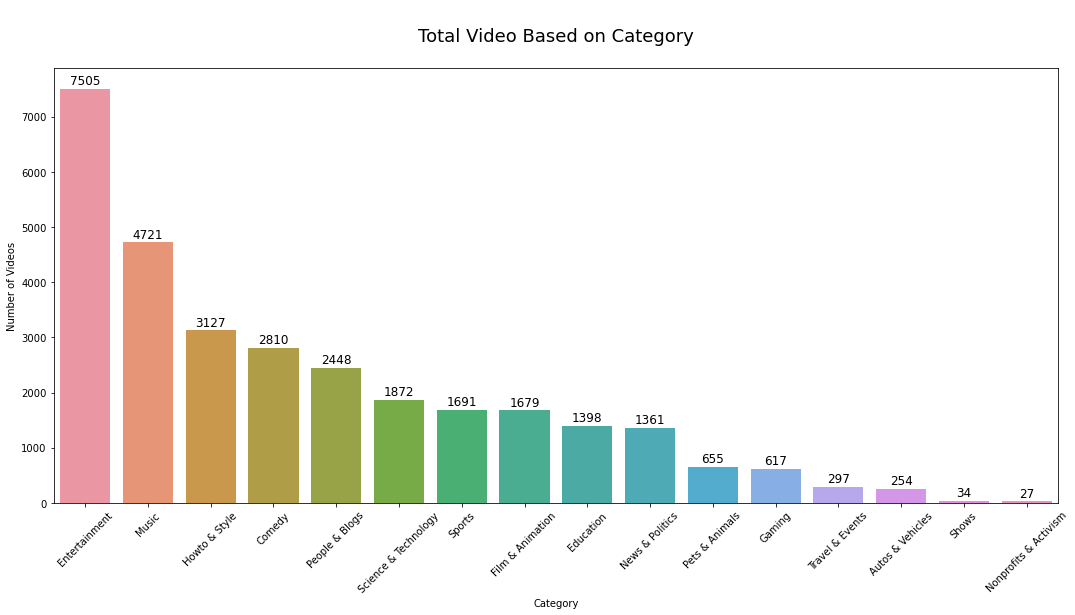

In [196]:
plt.figure(figsize=(18, 8))
plt.title('\nTotal Video Based on Category\n', size=18)


plots = sns.barplot(data = vid_by_cat, x='Category', y='Number of Videos')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation = 45)
plt.savefig('n_video_cat.png')
plt.show()

### Top 5 Trending Videos Category Come from Entertainment, Music, Howto & Style, Comedy, People & Blogs.